In [1]:
# libraries
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

## Sao Paolo Traffic data set

In [2]:
# 1. Hour
# 2. Immobilized bus
# 3. Broken Truck
# 4. Vehicle excess
# 5. Accident victim
# 6. Running over
# 7. Fire Vehicles
# 8. Occurrence involving freight
# 9. Incident involving dangerous freight
# 10. Lack of electricity
# 11. Fire
# 12. Point of flooding
# 13. Manifestations
# 14. Defect in the network of trolleybuses
# 15. Tree on the road
# 16. Semaphore off
# 17. Intermittent Semaphore
# 18. Slowness in traffic (%) (Target)

In [3]:
df = pd.read_csv('sao-paolo-traffic.csv',sep = ',')

cols = ['Hour', 'Immobilized bus', 'Broken Truck', 'Vehicle excess', 'Accident victim', 'Running over', 'Fire vehicles', 
        'Occurrence involving freight', 'Incident involving dangerous freight', 'Lack of electricity', 'Fire', 
        'Point of flooding', 'Manifestations', 'Defect in the network of trolleybuses', 'Tree on the road ', 'Semaphore off',
        'Intermittent Semaphore', 'Slowness in traffic (%)']

df.columns = cols
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Hour                                   135 non-null    int64  
 1   Immobilized bus                        135 non-null    int64  
 2   Broken Truck                           135 non-null    int64  
 3   Vehicle excess                         135 non-null    int64  
 4   Accident victim                        135 non-null    int64  
 5   Running over                           135 non-null    int64  
 6   Fire vehicles                          135 non-null    int64  
 7   Occurrence involving freight           135 non-null    int64  
 8   Incident involving dangerous freight   135 non-null    int64  
 9   Lack of electricity                    135 non-null    int64  
 10  Fire                                   135 non-null    int64  
 11  Point 

,Hour,Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1


In [4]:
# Break dataset into train and test data

slowness_index = list(df.columns).index("Slowness in traffic (%)")
train_cols = list(df.columns[0:slowness_index]) + list(df.columns[slowness_index+1:])
label = df.columns[slowness_index]
X_df = df[list(train_cols)]
y_df = df[label]

(array([ 5., 11.,  7., 10., 26., 12., 15., 12., 10.,  3.,  3.,  3.,  2.,
         2.,  6.,  1.,  3.,  0.,  2.,  2.]),
 array([ 3.4,  4.4,  5.4,  6.4,  7.4,  8.4,  9.4, 10.4, 11.4, 12.4, 13.4,
        14.4, 15.4, 16.4, 17.4, 18.4, 19.4, 20.4, 21.4, 22.4, 23.4]),
 <BarContainer object of 20 artists>)

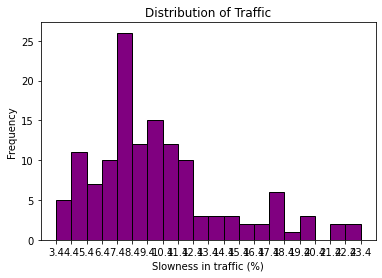

In [5]:
# Visualize traffic distribution
plt.title("Distribution of Traffic")
plt.xlabel("Slowness in traffic (%)")
plt.ylabel("Frequency")
plt.rcParams["figure.figsize"] = (20,8)

#plt.scatter(grades, students)

plt.xticks(np.arange(min(y_df), max(y_df)+1, 1.0))

plt.hist(y_df, color = 'purple', edgecolor = 'black', bins = int(20))

### Convert to categorical variable

In [6]:
y_df = y_df.apply(lambda x: "low" if x < 7.0 else ("med" if x <=15.0 else "high"))
# y_df = y_df.apply(lambda x: "low" if x <= 10 else "high")

In [7]:
dataset = {
        'X': X_df,
        'y': y_df,
}

# create a train/test split
seed = 1
X_train, X_test, y_train, y_test = train_test_split(dataset['X'],dataset['y'], test_size=0.25, random_state=seed)

## SVM

In [8]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
#Training accuracy
train_pred = clf.predict(X_train).tolist()
same_train = sum(x == y for x, y in zip(train_pred, y_train.tolist()))
accuracy_train = round(same_train/ len(train_pred), 5)

#Test set accuracy
predictions = clf.predict(X_test).tolist()
same_test = sum(x == y for x, y in zip(predictions, y_test.tolist()))
accuracy_test = round(same_test / len(predictions), 5)

print("The accuracy of the model on the training set is: ", accuracy_train)
print("The accuracy of the model on the test set is: ", accuracy_test)

The accuracy of the model on the training set is:  0.73267
The accuracy of the model on the test set is:  0.70588


<AxesSubplot:>

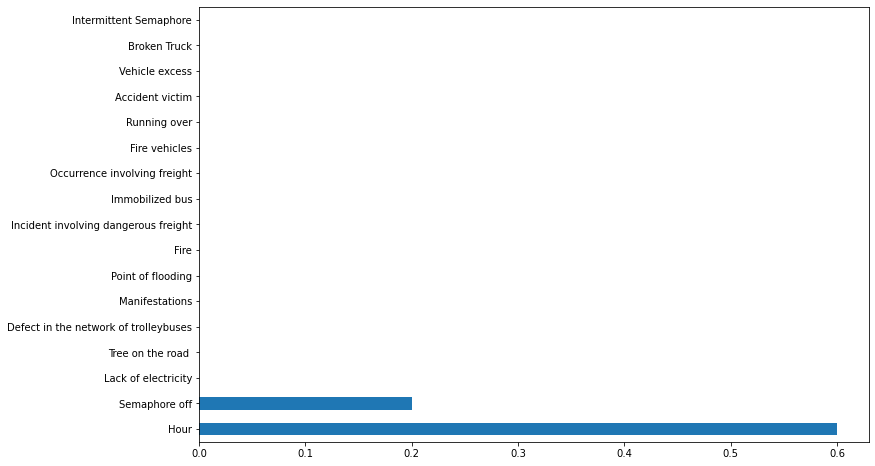

In [10]:
plt.figure(figsize=(12,8))
# Top 10 most important features
pd.Series(abs(clf.coef_[0]), index=dataset['X'].columns).nlargest(20).plot(kind='barh')

## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0,max_iter=10000).fit(X_train, y_train)

In [12]:
#Training accuracy
train_pred = lr.predict(X_train).tolist()
same_train = sum(x == y for x, y in zip(train_pred, y_train.tolist()))
accuracy_train = round(same_train/ len(train_pred), 5)

#Test set accuracy
predictions = lr.predict(X_test).tolist()
same_test = sum(x == y for x, y in zip(predictions, y_test.tolist()))
accuracy_test = round(same_test / len(predictions), 5)

print("The accuracy of the model on the training set is: ", accuracy_train)
print("The accuracy of the model on the test set is: ", accuracy_test)

The accuracy of the model on the training set is:  0.71287
The accuracy of the model on the test set is:  0.73529


<AxesSubplot:>

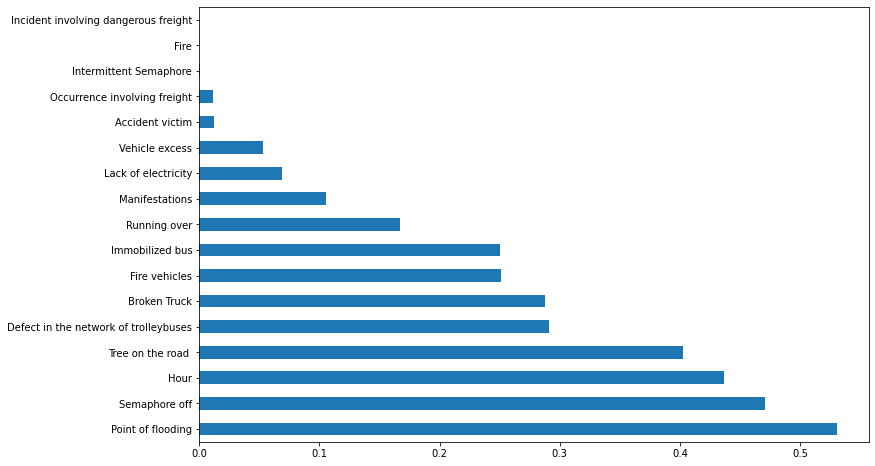

In [13]:
plt.figure(figsize=(12,8))
# Top 10 most important features
pd.Series(abs(lr.coef_[0]), index=dataset['X'].columns).nlargest(20).plot(kind='barh')

## Decision Tree

In [14]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [15]:
#Training accuracy
train_pred = dtree.predict(X_train).tolist()
same_train = sum(x == y for x, y in zip(train_pred, y_train.tolist()))
accuracy_train = round(same_train/ len(train_pred), 5)

#Test set accuracy
predictions = dtree.predict(X_test).tolist()
same_test = sum(x == y for x, y in zip(predictions, y_test.tolist()))
accuracy_test = round(same_test / len(predictions), 5)

print("The accuracy of the model on the training set is: ", accuracy_train)
print("The accuracy of the model on the test set is: ", accuracy_test)

The accuracy of the model on the training set is:  0.9802
The accuracy of the model on the test set is:  0.64706


<AxesSubplot:>

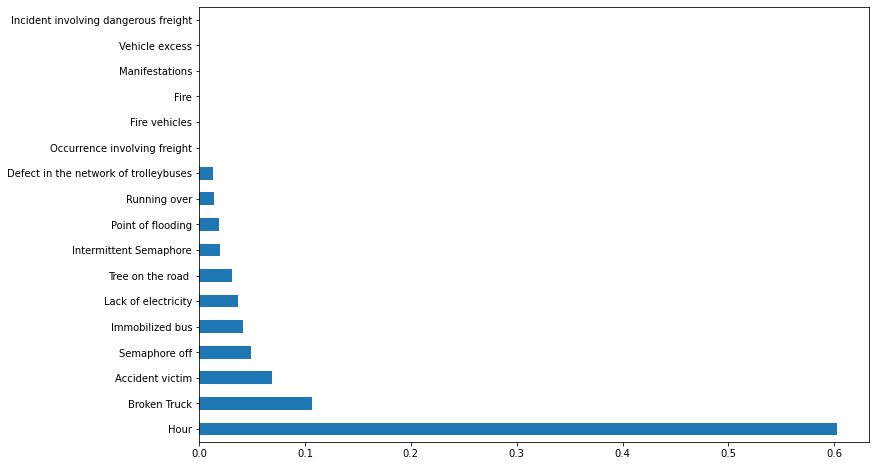

In [16]:
plt.figure(figsize=(12,8))
# Top 10 most important features
pd.Series(abs(dtree.feature_importances_), index=dataset['X'].columns).nlargest(20).plot(kind='barh')

## GAMs

In [17]:
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.model_selection import train_test_split


# train a GAM for the training dataset
ebm = ExplainableBoostingClassifier()

ebm.fit(X_train, y_train)

/Users/davisrule/opt/anaconda3/lib/python3.8/site-packages/interpret/glassbox/ebm/ebm.py:922: UserWarning: Multiclass is still experimental. Subject to change per release.
  warn("Multiclass is still experimental. Subject to change per release.")
/Users/davisrule/opt/anaconda3/lib/python3.8/site-packages/interpret/glassbox/ebm/ebm.py:925: UserWarning: Detected multiclass problem: forcing interactions to 0
  warn("Detected multiclass problem: forcing interactions to 0")


ExplainableBoostingClassifier(feature_names=['Hour', 'Immobilized bus',
                                             'Broken Truck', 'Vehicle excess',
                                             'Accident victim', 'Running over',
                                             'Fire vehicles',
                                             'Occurrence involving freight',
                                             'Incident involving dangerous '
                                             'freight',
                                             'Lack of electricity', 'Fire',
                                             'Point of flooding',
                                             'Manifestations',
                                             'Defect in the network of '
                                             'trolleybuses',
                                             'Tree on the road ',
                                             'Semaphore off',
                              

In [18]:
from interpret import show 

ebm_global = ebm.explain_global()
show(ebm_global)

/Users/davisrule/opt/anaconda3/lib/python3.8/site-packages/interpret/visual/udash.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
/Users/davisrule/opt/anaconda3/lib/python3.8/site-packages/interpret/visual/udash.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/Users/davisrule/opt/anaconda3/lib/python3.8/site-packages/interpret/visual/udash.py:7: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  import dash_table as dt


<!-- http://127.0.0.1:7001/140473363248320/ -->